# Initial Model using RandomForest and Gradient Boost

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/cleaned_data.csv")
df.head()

,OBJECT_NAME,OBJECT_ID,EPOCH,MEAN_MOTION,ECCENTRICITY,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,MEAN_ANOMALY,REV_AT_EPOCH,...,LAUNCH_DATE,SITE,TLE_LINE0,TLE_LINE1,TLE_LINE2,OBJECT_TYPE_ENCODED,RCS_SIZE_LARGE,RCS_SIZE_MEDIUM,RCS_SIZE_SMALL,RCS_SIZE_UNKNOWN
0,ARIANE 42P+ DEB,1992-072J,2021-10-31T22:46:50.340864,2.921700,0.652893,7.7156,90.2410,243.1216,38.7796,23588,...,1992.0,FRGUI,0 ARIANE 42P+ DEB,1 26741U 92072J 21304.94919376 .00000883 0...,2 26741 7.7156 90.2410 6528926 243.1216 38...,0,0.0,1.0,0.0,0.0
1,SL-8 DEB,1979-028C,2021-10-31T16:32:17.360448,13.754973,0.003072,82.9193,299.1120,158.9093,201.3337,50124,...,1979.0,PKMTR,0 SL-8 DEB,1 26743U 79028C 21304.68908982 .00000079 0...,2 26743 82.9193 299.1120 0030720 158.9093 201...,0,0.0,0.0,1.0,0.0
2,GSAT 1,2001-015A,2021-11-01T05:22:43.421952,1.038224,0.023739,12.1717,16.5368,250.1248,146.2900,7798,...,2001.0,SRI,0 GSAT 1,1 26745U 01015A 21305.22411368 -.00000165 0...,2 26745 12.1717 16.5368 0237386 250.1248 146...,1,1.0,0.0,0.0,0.0
3,CZ-4 DEB,1999-057MB,2021-10-31T11:11:24.198720,14.775907,0.006062,98.4781,8.7205,37.3771,323.1632,10204,...,1999.0,TSC,0 CZ-4 DEB,1 26754U 99057MB 21304.46625230 .00002265 0...,2 26754 98.4781 8.7205 0060618 37.3771 323...,0,0.0,0.0,1.0,0.0
4,CZ-4 DEB,1999-057MC,2021-10-31T17:46:46.681248,14.724482,0.006226,98.4232,122.0724,345.1605,27.6061,9622,...,1999.0,TSC,0 CZ-4 DEB,1 26755U 99057MC 21304.74081807 .00002610 0...,2 26755 98.4232 122.0724 0062255 345.1605 27...,0,0.0,0.0,1.0,0.0


In [3]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Encode OBJECT_TYPE
df['OBJECT_TYPE_ENCODED'] = label_encoder.fit_transform(df['OBJECT_TYPE'])

# Split into X and Y
X = df.drop(columns=['OBJECT_TYPE', 'OBJECT_TYPE_ENCODED'])  # Features
y = df['OBJECT_TYPE_ENCODED']  # Encoded target

In [4]:
X.columns

Index(['OBJECT_NAME', 'OBJECT_ID', 'EPOCH', 'MEAN_MOTION', 'ECCENTRICITY',
       'INCLINATION', 'RA_OF_ASC_NODE', 'ARG_OF_PERICENTER', 'MEAN_ANOMALY',
       'REV_AT_EPOCH', 'BSTAR', 'MEAN_MOTION_DOT', 'MEAN_MOTION_DDOT',
       'SEMIMAJOR_AXIS', 'PERIOD', 'APOAPSIS', 'PERIAPSIS', 'COUNTRY_CODE',
       'LAUNCH_DATE', 'SITE', 'TLE_LINE0', 'TLE_LINE1', 'TLE_LINE2',
       'RCS_SIZE_LARGE', 'RCS_SIZE_MEDIUM', 'RCS_SIZE_SMALL',
       'RCS_SIZE_UNKNOWN'],
      dtype='object')

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Drop non-numeric columns from X
X = X.drop(columns=['OBJECT_NAME', 'OBJECT_ID', 'SITE', 'TLE_LINE0', 'TLE_LINE1', 'TLE_LINE2', 'EPOCH','COUNTRY_CODE'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a column transformer for preprocessing
# For categorical columns, OneHotEncoder. For numerical columns, SimpleImputer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), X.select_dtypes(include=['float64', 'int64']).columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), X.select_dtypes(include=['object']).columns)
    ])

# Pipeline that preprocesses the data and fits RandomForestClassifier
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [6]:
# Evaluate the model
from sklearn.metrics import accuracy_score, f1_score, recall_score
print("Random Forest Model Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))

Random Forest Model Metrics:
Accuracy: 0.9672015101462954
F1: 0.9128858420881819
Recall: 0.8952278838357163


In [7]:
#Cross-Validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())


Cross-validation scores: [0.6640708  0.84389381 0.95787611 0.96955752 0.89061947]
Mean accuracy: 0.8652035398230089


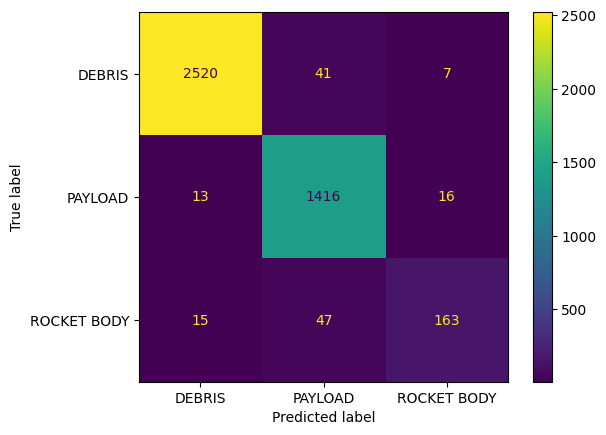

In [8]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_).plot()

In [9]:
#Trying GradientBoost Model

from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting Classifier pipeline
gb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Train the Gradient Boosting model
gb_model.fit(X_train, y_train)

# Make predictions with Gradient Boosting
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model (e.g., Accuracy)
print("Gradient Boost Model Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("F1:", f1_score(y_test, y_pred_gb, average='macro'))
print("Recall:", recall_score(y_test, y_pred_gb, average='macro'))

Gradient Boost Model Metrics:
Accuracy: 0.9603586597451628
F1: 0.9055649097471385
Recall: 0.8919476513346772


In [ ]:
#Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import numpy as np

param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}


rf = RandomForestClassifier(random_state=42, class_weight='balanced')

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=100,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)

best_rf_model = random_search.best_estimator_


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=70; total time=   2.5s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=70; total time=   2.5s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=70; total time=   2.8s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=137; total time=   4.5s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=137; total time= -16.5s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=137; total time= -16.4s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=70; total time=   2

In [32]:
opt_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', best_rf_model)
])

opt_model.fit(X_train, y_train)
y_pred = opt_model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test F1 Score:", f1_score(y_test, y_pred, average='macro'))
print("Test Recall:", recall_score(y_test, y_pred, average='macro'))

Test Accuracy: 0.9563473336479471
Test F1 Score: 0.8916504693057132
Test Recall: 0.9138694678897764


## Key Findings:
- Tried Random Forest and Gradient Boost Models. Found that Random Forest performed slightly better.
- We want to optimize the Recall score, so as to not miss Debris. 
- Next steps will be further model tuning. Maybe exploring alternate models and feature engineering. 

In [ ]:
# Feature importances
feature_names = X.columns.tolist()
feature_importances = best_rf_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)
